## Import Basic Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Core Data Analysis Libraries:
1. **`pandas as pd`**  
   - Primary tool for **data manipulation and analysis**  
   - Used for:  
     ✓ Loading datasets (CSV/Excel)  
     ✓ Cleaning/transforming data (handling missing values, filtering)  
     ✓ Calculating RFM metrics (groupby, aggregations)  

2. **`numpy as np`**  
   - Foundation for **numerical computing**  
   - Used for:  
     ✓ Mathematical operations on RFM scores  
     ✓ Handling arrays/matrices for machine learning  
     ✓ Statistical calculations (percentiles for RFM segmentation)

### Data Visualization Libraries:
3. **`seaborn as sns`**  
   - High-level **statistical visualization**  
   - Used for:  
     ✓ Creating RFM cluster heatmaps  
     ✓ Visualizing customer segment distributions  
     ✓ Professional-looking plots with minimal code

4. **`matplotlib.pyplot as plt`**  
   - Core **plotting library** (Seaborn builds on this)  
   - Used for:  
     ✓ Customizing Seaborn visuals  
     ✓ Creating scatter plots of customer segments  
     ✓ Adding annotations/labels to RFM visualizations

### Business Context:
These libraries form the **essential toolkit** for:
- Preprocessing transaction data for RFM analysis  
- Visualizing customer behavior patterns  
- Supporting machine learning (k-Means clustering)

## Load Dataset

**Data Loading**
- Used `encoding='unicode_escape'` to handle special characters (e.g., £) in the retail dataset

In [2]:
df = pd.read_csv('Online_Retail_Dataset.csv', encoding = 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France



### **Dataset Explanation (Online Retail Dataset)**

This dataset contains transactions made by a UK-based online retail store. It records customer purchases over a period of time. Each row represents a single product in an invoice.

####  Column Descriptions:

* **InvoiceNo**:
  Unique number assigned to a transaction (or invoice). One invoice may contain multiple products.
  🔹 *Example: If a customer buys 3 items together, all 3 will have the same InvoiceNo.*

* **StockCode**:
  A unique code assigned to each item/product.

* **Description**:
  Name or short description of the product.

* **Quantity**:
  How many units of the product were purchased in that row.

* **InvoiceDate**:
  The date and time when the invoice was generated (i.e., when the transaction occurred).

* **UnitPrice**:
  Price per single unit of the product.

* **CustomerID**:
  A unique ID representing a customer.

* **Country**:
  Country from where the purchase was made.

---

### **What is RFM Analysis?**

RFM stands for:

1. **Recency (R)** – How recently a customer made a purchase.
   👉 *To calculate this, we need the `InvoiceDate`.*

2. **Frequency (F)** – How often a customer makes a purchase.
   👉 *We use `InvoiceNo` grouped by `CustomerID` to count how many times they ordered.*

3. **Monetary (M)** – How much money a customer has spent.
   👉 *This is calculated by `Quantity × UnitPrice` per transaction, summed per customer.*

---

### **RFM Column Mapping from the Dataset**

| RFM Component | Required Column(s)        | Description                                                           |
| ------------- | ------------------------- | --------------------------------------------------------------------- |
| Recency       | `InvoiceDate`             | To find how many days ago the last purchase was made                  |
| Frequency     | `InvoiceNo`, `CustomerID` | To count how many unique purchases each customer made                 |
| Monetary      | `Quantity`, `UnitPrice`   | To calculate total money spent by multiplying quantity and unit price |

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# Convert 'CustomerID' from float to int
# df['CustomerID'] = df['CustomerID'].astype(int) 
# Error: IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df['InvoiceNo'].value_counts()

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64

In [7]:
df['CustomerID'].value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [8]:
# Step 1: Filter rows where CustomerID is null
null_cust_df = df[df['CustomerID'].isnull()]

# Step 2: Count how many times each InvoiceNo appears
invoice_counts = null_cust_df['InvoiceNo'].value_counts()

# Step 3: Filter those InvoiceNo where count > 500
high_invoice_nos = invoice_counts[invoice_counts > 500]

# Step 4: Show how many such InvoiceNo exist
print("Number of InvoiceNo with count > 500 and CustomerID is null:", len(high_invoice_nos))

Number of InvoiceNo with count > 500 and CustomerID is null: 46


Since we do not have access to the complete payment history in this dataset, it would not be meaningful to work with entries where `CustomerID` is missing. We could have considered retaining those records only if there were a reliable way to identify or reconstruct the missing customer information from other data sources.

Therefore, it is reasonable to remove rows with null `CustomerID` values for the purpose of RFM analysis.

However, even if we choose not to explicitly drop them, it will not affect the final result. This is because `CustomerID` is only required to calculate **Frequency** — specifically, by grouping `InvoiceNo` per customer. During this grouping process, any null `CustomerID` entries will automatically be excluded, as they cannot be grouped properly.

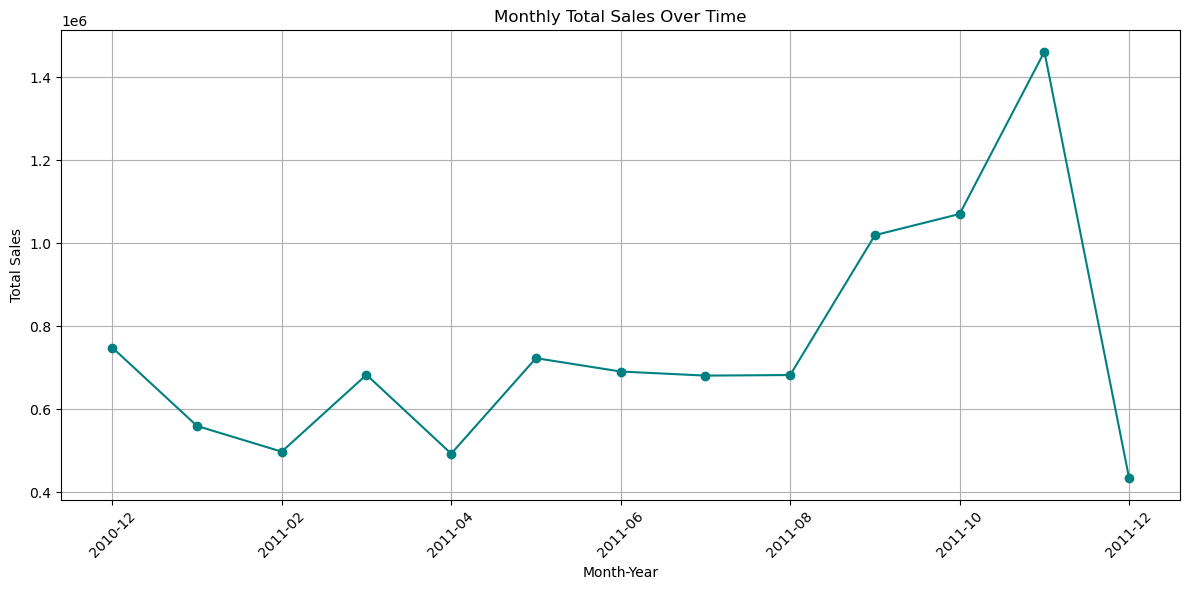

In [9]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create 'Month_Year' column for full timeline
df['Month_Year'] = df['InvoiceDate'].dt.to_period('M').astype(str)

# Group by 'Month_Year' and calculate total sales
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
monthly_sales = df.groupby('Month_Year')['TotalSales'].sum()

# Plotting
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', title='Monthly Total Sales Over Time', color='teal')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Preprocessing for Recency

In [10]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_Year,TotalSales
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12,14.85


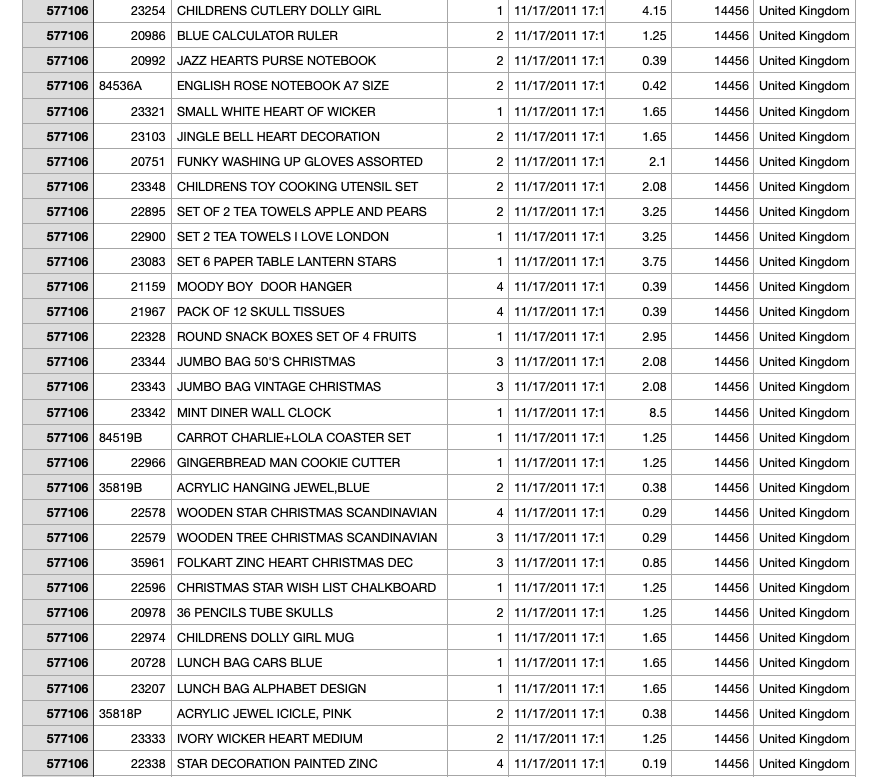

**Date Format: MM/DD/YYYY**

In [11]:
currentDate = pd.to_datetime("2012-01-01") #"YYYY-MM-DD"
currentDate

Timestamp('2012-01-01 00:00:00')

In [12]:
df['InvoiceDate']=pd.to_datetime(df["InvoiceDate"])

In [13]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_Year,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60


In [14]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Month_Year             object
TotalSales            float64
dtype: object

In [15]:
maxdate = df.groupby(["CustomerID"]).max()[['InvoiceDate']]
maxdate

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:17:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


In [16]:
(currentDate - maxdate['InvoiceDate']).dt.days

CustomerID
12346.0    347
12347.0     24
12348.0     97
12349.0     40
12350.0    332
          ... 
18280.0    299
18281.0    202
18282.0     29
18283.0     25
18287.0     64
Name: InvoiceDate, Length: 4372, dtype: int64

In [17]:
maxdate['InvoiceAge(days)'] = (currentDate - maxdate['InvoiceDate']).dt.days
maxdate

,InvoiceDate,InvoiceAge(days)
CustomerID,,
12346.0,2011-01-18 10:17:00,347
12347.0,2011-12-07 15:52:00,24
12348.0,2011-09-25 13:13:00,97
12349.0,2011-11-21 09:51:00,40
12350.0,2011-02-02 16:01:00,332
...,...,...
18280.0,2011-03-07 09:52:00,299
18281.0,2011-06-12 10:53:00,202
18282.0,2011-12-02 11:43:00,29


## Recenccy Column

In [18]:
recency = maxdate.drop('InvoiceDate', axis=1)
recency

,InvoiceAge(days)
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332
...,...
18280.0,299
18281.0,202
18282.0,29


### Preprocessing for Frecuency

In [19]:
frequency = df.drop_duplicates(subset="InvoiceNo")
frequency

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_Year,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12,54.08
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,2010-12,25.50
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,2010-12,17.85
...,...,...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom,2011-12,58.00
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom,2011-12,51.84
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom,2011-12,4.68
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,2011-12,23.60


```python
freq = df.drop_duplicates(subset="InvoiceNo")
```

### 🔍 What does `subset="InvoiceNo"` mean?

This line tells pandas:

> “From the entire DataFrame `df`, drop any duplicate rows **based only on the `InvoiceNo` column**. Keep just the **first occurrence** of each unique `InvoiceNo`.”

---

###  Example to Understand:

Imagine your data has this:

| InvoiceNo | StockCode | Quantity |
| --------- | --------- | -------- |
| 10001     | A         | 2        |
| 10001     | B         | 1        |
| 10001     | C         | 5        |
| 10002     | D         | 3        |

Here, `InvoiceNo = 10001` appears **3 times**, but represents **a single transaction** with 3 different products.

So,

```python
df.drop_duplicates(subset="InvoiceNo")
```

would keep only **one row for each InvoiceNo**, like:

| InvoiceNo | StockCode | Quantity |
| --------- | --------- | -------- |
| 10001     | A         | 2        |
| 10002     | D         | 3        |

---

### ✅ Why it's useful:

In **RFM analysis**, to calculate **Frequency**, you want to count:

> “How many *invoices/orders* a customer placed?”

So you need **unique InvoiceNo per CustomerID** — and this line helps remove duplicates.

---

### 🔚 Final Summary:

`subset="InvoiceNo"` means:

* Drop duplicate rows by looking only at the `InvoiceNo` column.
* Keep just one row per unique InvoiceNo.
* Useful when you want a list of distinct invoices, ignoring product-level duplicates.

## Frequency Column

In [20]:
frequency_2 = frequency.groupby(["CustomerID"]).count()[["InvoiceNo"]]
frequency_2

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,3


### Preprocessing for Monetary

In [21]:
df["TotalAmount"]=df["Quantity"]*df["UnitPrice"]

In [22]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_Year,TotalSales,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,10.20,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,12.60,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60,16.60


## Monetary Column

In [23]:
monetary=df.groupby(["CustomerID"])[["TotalAmount"]].sum()
monetary

,TotalAmount
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [24]:
df[df['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_Year,TotalSales,TotalAmount
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01,77183.6,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01,-77183.6,-77183.6


In [25]:
RFM=pd.concat([recency,frequency_2,monetary], axis=1)
RFM

,InvoiceAge(days),InvoiceNo,TotalAmount
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,3,176.60


## RFM Clean Dataset

In [26]:
RFM.columns = ['Recency', 'Frequency', 'Monetary']
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,3,176.60


## Standard Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(RFM)

In [28]:
scaled_data

array([[ 2.31656788, -0.32936215, -0.23100099],
       [-0.88904975,  0.20610242,  0.29343167],
       [-0.16456032, -0.11517632, -0.01231622],
       ...,
       [-0.83942719, -0.22226923, -0.20951263],
       [-0.87912524,  1.16993863,  0.02390005],
       [-0.49206924, -0.22226923, -0.00744423]])

In [29]:
scaled_data.shape

(4372, 3)

## K-Means Algorithm import

In [30]:
from sklearn.cluster import KMeans

### To find out the value of K

In [31]:
k_range = range(2,11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42) 
    km.fit(scaled_data)
    sse.append(km.inertia_)

In [32]:
sse

[9424.348420804254,
 5527.743989413121,
 4081.8960970338676,
 3020.273351653977,
 2555.2473654260557,
 1924.410935159485,
 1728.5458937093777,
 1495.6573852198976,
 1252.5721783096562]

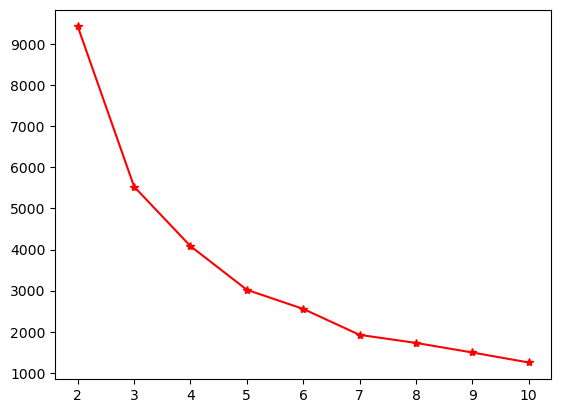

In [33]:
plt.plot(k_range, sse, 'r-*')
plt.xlabel ='k'
plt.ylabel = 'Sum of Squared Error'

In [34]:
# pip install yellowbrick

Collecting yellowbrick
  Downloading yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
Requirement already satisfied: matplotlib!=3.0.0,>=2.0.2 in /opt/anaconda3/lib/python3.12/site-packages (from yellowbrick) (3.9.2)
Requirement already satisfied: scipy>=1.0.0 in /opt/anaconda3/lib/python3.12/site-packages (from yellowbrick) (1.13.1)
Requirement already satisfied: scikit-learn>=1.0.0 in /opt/anaconda3/lib/python3.12/site-packages (from yellowbrick) (1.5.1)
Requirement already satisfied: numpy>=1.16.0 in /opt/anaconda3/lib/python3.12/site-packages (from yellowbrick) (1.26.4)
Requirement already satisfied: cycler>=0.10.0 in /opt/anaconda3/lib/python3.12/site-packages (from yellowbrick) (0.11.0)
Requirement already satisfied: contourpy>=1.0.1 in /opt/anaconda3/lib/python3.12/site-packages (from matplotlib!=3.0.0,>=2.0.2->yellowbrick) (1.2.0)
Requirement already satisfied: fonttools>=4.22.0 in /opt/anaconda3/lib/python3.12/site-packages (from matplotlib!=3.0.0,>=2.0.2->yellowbrick) (4.51.0)
Requirement already satisfied: kiwisolver>=1.3.1 in /opt/anaconda3/lib/python3.12/site-packages (from matplotlib!=3.0.0,>=2.0.2->yellowbrick) (1.4.4)
Requirement already satisfied: packaging>=20.0 in /opt/anaconda3/lib/python3.12/site-packages (from matplotlib!=3.0.0,>=2.0.2->yellowbrick) (24.1)
Requirement already satisfied: pillow>=8 in /opt/anaconda3/lib/python3.12/site-packages (from matplotlib!=3.0.0,>=2.0.2->yellowbrick) (10.4.0)
Requirement already satisfied: pyparsing>=2.3.1 in /opt/anaconda3/lib/python3.12/site-packages (from matplotlib!=3.0.0,>=2.0.2->yellowbrick) (3.1.2)
Requirement already satisfied: python-dateutil>=2.7 in /opt/anaconda3/lib/python3.12/site-packages (from matplotlib!=3.0.0,>=2.0.2->yellowbrick) (2.9.0.post0)
Requirement already satisfied: joblib>=1.2.0 in /opt/anaconda3/lib/python3.12/site-packages (from scikit-learn>=1.0.0->yellowbrick) (1.4.2)
Requirement already satisfied: threadpoolctl>=3.1.0 in /opt/anaconda3/lib/python3.12/site-packages (from scikit-learn>=1.0.0->yellowbrick) (3.5.0)
Requirement already satisfied: six>=1.5 in /opt/anaconda3/lib/python3.12/site-packages (from python-dateutil>=2.7->matplotlib!=3.0.0,>=2.0.2->yellowbrick) (1.16.0)
Downloading yellowbrick-1.5-py3-none-any.whl (282 kB)
Installing collected packages: yellowbrick
Successfully installed yellowbrick-1.5
Note: you may need to restart the kernel to use updated packages.

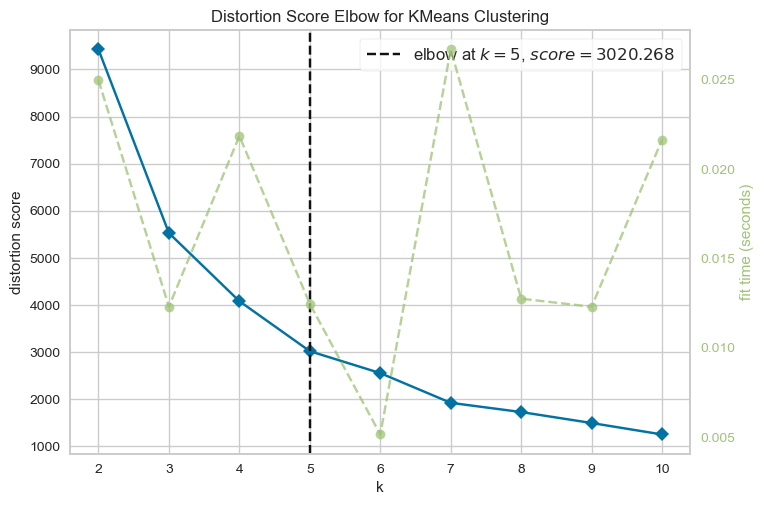

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
Elbow = KElbowVisualizer(model, k=10)
Elbow.fit(scaled_data)
Elbow.show()

### Object Creation and data fitting

In [36]:
kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [37]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [38]:
kmeans.labels_.shape

(4372,)

In [39]:
RFM["Clusters"]=(kmeans.labels_)

In [40]:
RFM

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,2,0.00,1
12347.0,24,7,4310.00,0
12348.0,97,4,1797.24,0
12349.0,40,1,1757.55,0
12350.0,332,1,334.40,1
...,...,...,...,...
18280.0,299,1,180.60,1
18281.0,202,1,80.82,1
18282.0,29,3,176.60,0


In [41]:
RFM.Clusters.unique()

array([1, 0, 2], dtype=int32)

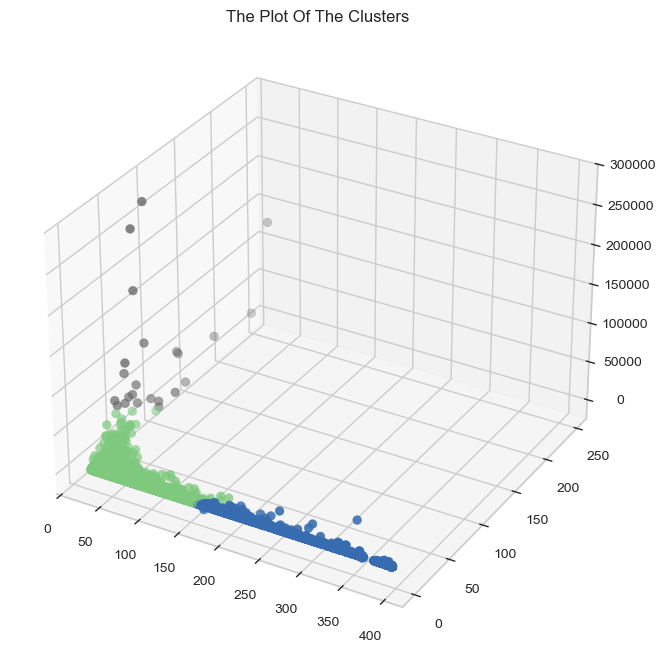

In [42]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(RFM["Recency"],RFM["Frequency"],RFM["Monetary"], s=40, c=RFM["Clusters"], marker='o', cmap = "Accent")
ax.set_title("The Plot Of The Clusters")
plt.show()

In [43]:
RFM[RFM.Clusters==0]

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12347.0,24,7,4310.00,0
12348.0,97,4,1797.24,0
12349.0,40,1,1757.55,0
12352.0,58,11,1545.41,0
12356.0,44,3,2811.43,0
...,...,...,...,...
18277.0,80,2,97.63,0
18278.0,95,1,173.90,0
18282.0,29,3,176.60,0


In [44]:
RFM[RFM.Clusters==1]

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,2,0.00,1
12350.0,332,1,334.40,1
12353.0,226,1,89.00,1
12354.0,254,1,1079.40,1
12355.0,236,1,459.40,1
...,...,...,...,...
18260.0,194,8,2595.00,1
18262.0,162,1,149.48,1
18269.0,380,2,138.90,1


In [45]:
RFM[RFM.Clusters==2]

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12415.0,46,26,123725.45,2
12748.0,22,224,29072.10,2
12971.0,25,89,10930.26,2
13089.0,24,118,57385.88,2
13408.0,23,81,27487.41,2
13694.0,25,60,62653.10,2
13798.0,23,63,36351.42,2
14096.0,26,34,57120.91,2
14156.0,31,66,113384.14,2


In [46]:
RFM['Clusters'].value_counts()

Clusters
0    3245
1    1104
2      23
Name: count, dtype: int64

In [47]:
RFM.groupby('Clusters')[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
Clusters,,,
0,61.658552,5.595069,1821.973009
1,267.990942,1.844203,457.915472
2,27.521739,86.869565,81835.857391


In [48]:
def func(row):
    if row["Clusters"]==1:
        return 'Silver'
    elif row["Clusters"]==0:
        return 'Gold'
    else:
        return 'Diamond'

In [49]:
RFM['group']=RFM.apply(func, axis=1)

In [50]:
RFM

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
12346.0,347,2,0.00,1,Silver
12347.0,24,7,4310.00,0,Gold
12348.0,97,4,1797.24,0,Gold
12349.0,40,1,1757.55,0,Gold
12350.0,332,1,334.40,1,Silver
...,...,...,...,...,...
18280.0,299,1,180.60,1,Silver
18281.0,202,1,80.82,1,Silver
18282.0,29,3,176.60,0,Gold


In [51]:
result = pd.DataFrame(RFM.group.value_counts())

In [52]:
RFM['group'].value_counts()

group
Gold       3245
Silver     1104
Diamond      23
Name: count, dtype: int64

In [53]:
# import seaborn as sns

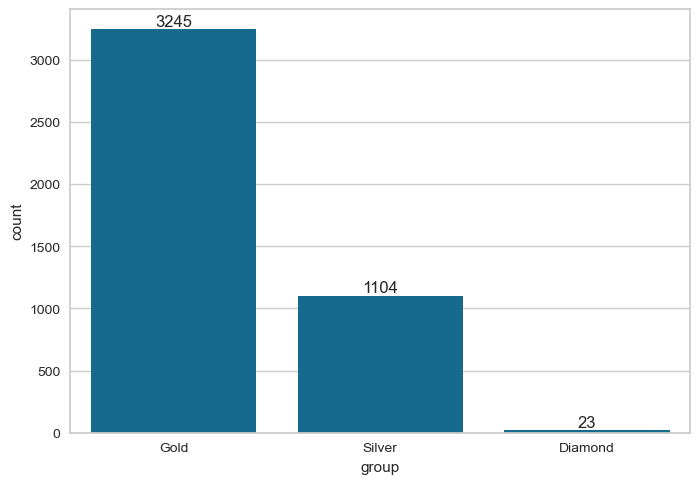

In [54]:
datalabel=sns.barplot(x="group", y="count", data=result, estimator=np.sum)
for i in datalabel.containers:
    datalabel.bar_label(i,)

In [55]:
ABC = RFM[RFM.Clusters==2]

In [56]:
ABC[ABC['Monetary']==ABC['Monetary'].min()]

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
12971.0,25,89,10930.26,2,Diamond


In [57]:
ABC[ABC['Monetary']==ABC['Monetary'].max()]

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
14646.0,23,77,279489.02,2,Diamond


In [58]:
ABC = RFM[RFM.Clusters==0]
ABC[ABC['Monetary']==ABC['Monetary'].max()]

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
15769.0,29,29,51823.72,0,Gold


In [59]:
RFM.groupby('group')['Monetary'].sum().sort_values(ascending=False)

group
Gold       5912302.413
Diamond    1882224.720
Silver      505538.681
Name: Monetary, dtype: float64

<Axes: xlabel='group', ylabel='Recency'>

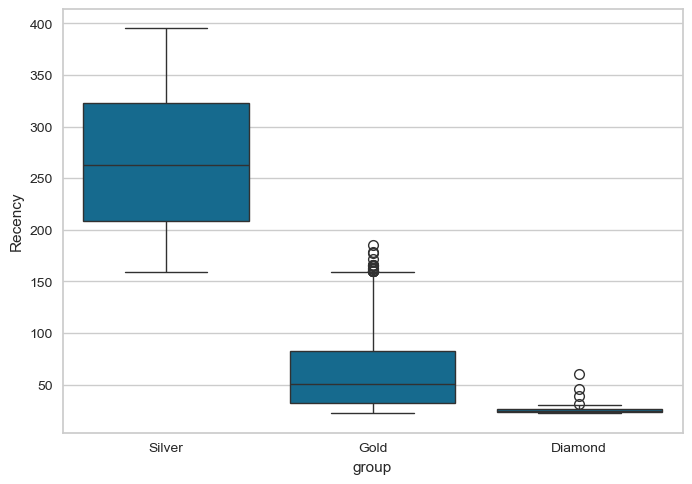

In [60]:
sns.boxplot(data=RFM, x='group', y='Recency')


In [61]:
RFM.sort_values(by='Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
14646.0,23,77,279489.02,2,Diamond
18102.0,22,62,256438.49,2,Diamond
17450.0,30,55,187482.17,2,Diamond
14911.0,23,248,132572.62,2,Diamond
12415.0,46,26,123725.45,2,Diamond
14156.0,31,66,113384.14,2,Diamond
17511.0,24,46,88125.38,2,Diamond
16684.0,26,31,65892.08,2,Diamond
13694.0,25,60,62653.10,2,Diamond


In [62]:
RFM.groupby('group')['Monetary'].mean().sort_values(ascending=False)

group
Diamond    81835.857391
Gold        1821.973009
Silver       457.915472
Name: Monetary, dtype: float64

In [63]:
RFM.groupby('group')['Frequency'].mean().sort_values(ascending=False)


group
Diamond    86.869565
Gold        5.595069
Silver      1.844203
Name: Frequency, dtype: float64

In [64]:
RFM.groupby('group')['Recency'].mean().sort_values()

group
Diamond     27.521739
Gold        61.658552
Silver     267.990942
Name: Recency, dtype: float64

<Axes: ylabel='group'>

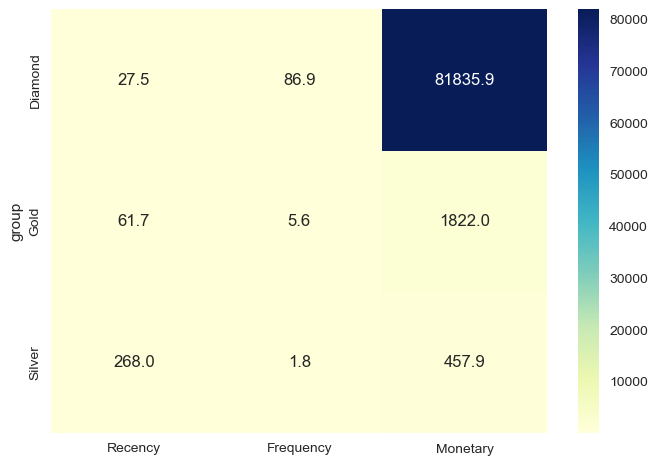

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(RFM.groupby('group')[['Recency', 'Frequency', 'Monetary']].mean(), annot=True, fmt=".1f", cmap="YlGnBu")

In [66]:
top_20 = int(0.2 * len(RFM))
top_rev = RFM.sort_values(by='Monetary', ascending=False).head(top_20)['Monetary'].sum()
total_rev = RFM['Monetary'].sum()
print(f"Top 20% customers contribute {(top_rev/total_rev)*100:.2f}% of revenue")

Top 20% customers contribute 73.82% of revenue


<Axes: title={'center': 'Monthly Unique Customers'}, xlabel='Month'>

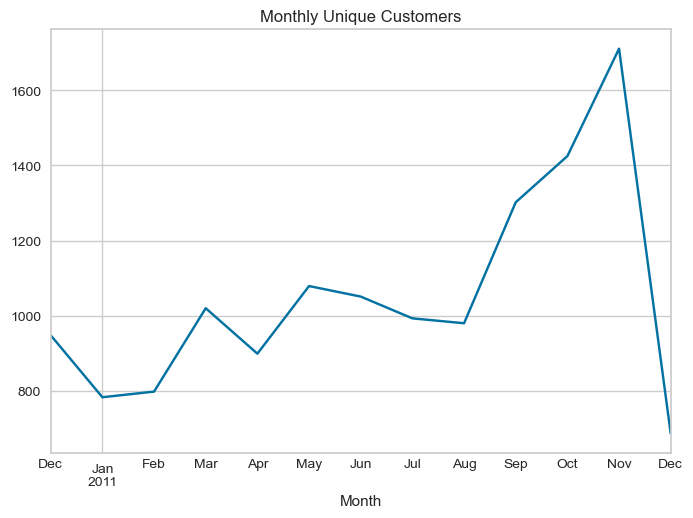

In [67]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_cust = df.groupby('Month')['CustomerID'].nunique()
monthly_cust.plot(kind='line', title="Monthly Unique Customers")

In [68]:
print(RFM.columns)

Index(['Recency', 'Frequency', 'Monetary', 'Clusters', 'group'], dtype='object')


In [69]:
# Step 1: Reset index if not already
RFM = RFM.reset_index()

# Step 2: Convert to string for merge
df['CustomerID'] = df['CustomerID'].astype(str)
RFM['CustomerID'] = RFM['CustomerID'].astype(str)

# Step 3: Merge to bring group info
merged = df.merge(RFM[['CustomerID', 'group']], on='CustomerID', how='inner')

# Step 4: Filter only Diamond customers
diamond_customers = merged[merged['group'] == 'Diamond']

# ✅ Step 5: Get unique Diamond CustomerID with Country
unique_diamond_customers = diamond_customers[['CustomerID', 'Country']].drop_duplicates()

# ✅ Step 6: Count number of Diamond customers per country
diamond_by_country = unique_diamond_customers['Country'].value_counts().reset_index()
diamond_by_country.columns = ['Country', 'Diamond Customer Count']

print(diamond_by_country)


          Country  Diamond Customer Count
0  United Kingdom                      19
1            EIRE                       2
2     Netherlands                       1
3       Australia                       1


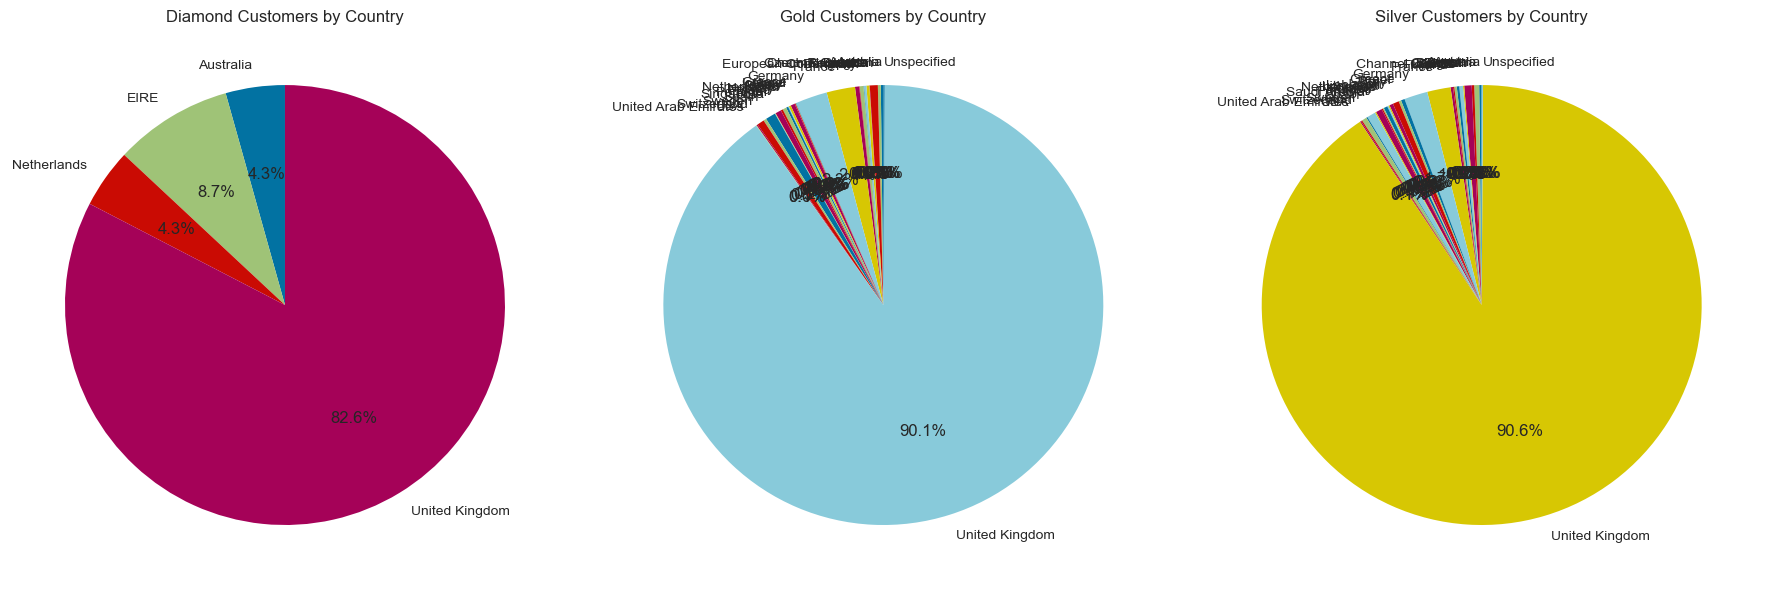

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample structure for merged dataframe (simulating based on earlier steps)
# Let's assume `merged` dataframe is already created with 'CustomerID', 'Country', and 'group'

# Drop duplicates to ensure unique customers per group
unique_customers = merged[['CustomerID', 'Country', 'group']].drop_duplicates()

# Count customers per country for each group
grouped_country = unique_customers.groupby(['group', 'Country']).size().reset_index(name='Customer Count')

# Pivot for pie chart (one for each group)
diamond = grouped_country[grouped_country['group'] == 'Diamond']
gold = grouped_country[grouped_country['group'] == 'Gold']
silver = grouped_country[grouped_country['group'] == 'Silver']

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Diamond Pie
axs[0].pie(diamond['Customer Count'], labels=diamond['Country'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Diamond Customers by Country')

# Gold Pie
axs[1].pie(gold['Customer Count'], labels=gold['Country'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Gold Customers by Country')

# Silver Pie
axs[2].pie(silver['Customer Count'], labels=silver['Country'], autopct='%1.1f%%', startangle=90)
axs[2].set_title('Silver Customers by Country')

plt.tight_layout()
plt.show()
